In [96]:
import csv
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
URL = "bbc-text.csv"

In [70]:
#another Method to read csv
# category=[]
# text=[]
# with open(URL,'r') as csv_read:
#     read=csv.reader(csv_read,delimiter=',')
#     next(read)
#     for i,k in read:
#         category.append(i)
#         text.append(k)
#

In [66]:
data=pd.read_csv(URL)
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [73]:
data.isnull().any()

category    False
text        False
dtype: bool

In [74]:
data.isna().any()

category    False
text        False
dtype: bool

In [78]:
data[data.category.str.len()==0]

,category,text


In [79]:
data[data.text.str.len()==0]

,category,text


In [90]:
labels=data.category.unique().tolist()
labels

['tech', 'business', 'sport', 'entertainment', 'politics']

In [100]:
tech_news=data[data.category =='tech'].count()[0]
tech_news

401

In [101]:
business_news=data[data.category =='business'].count()[0]
business_news

510

In [102]:
sports_news = data[data.category =='sport'].count()[0]
sports_news

511

In [103]:
entr_news=data[data.category =='entertainment'].count()[0]
entr_news

386

In [104]:
politics_news=data[data.category =='politics'].count()[0]
politics_news

417

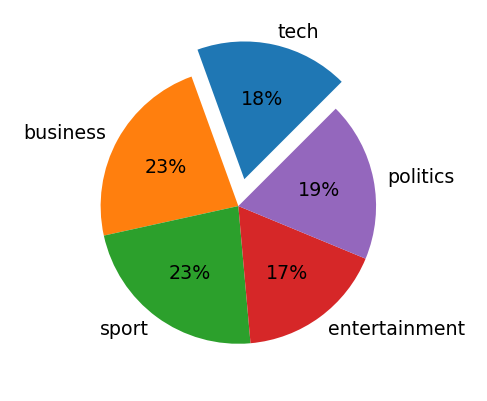

In [116]:
#pie chart visualisation of category of NEWS
size=[tech_news,business_news,sports_news,entr_news,politics_news]
plt.figure(figsize=(2,2),dpi=228)
plt.pie(size,labels=labels,explode=[0.2,0,0.0,0,0.0],textprops={'fontsize':6},startangle=45,autopct='%1.0f%%')

plt.show()

# Preprocessing + NLP

In [158]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
#initilize
lammitizer=WordNetLemmatizer()
stemmer=PorterStemmer()

In [178]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "us","up", "very", "was", "we", "we'd", "we'll", "we're", "we've","will","well","shall", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you","your's" "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves","one","two","three","four","five","six","seven","ten","eight","nine","hundred","thousand","million","billion","doller","time","year","date"]

In [179]:
# continue
# hold
# remain
# occur
# means
# one
#"time" 
#"year"
#'take' 

In [202]:
var={}
index_=0
def cleaning(message):
    
    global var
    global index_
    message = re.sub(r'([!,.@$%&<>?:;()+-/^0-9|]+)|(http\S+)|(#\S+)', '', message)
    message=re.sub(r'[#@]\S+',"",message)
    message=re.sub(r'\.',"",message)
    #words=word_tokenize(message)
    words=message.split()
    filtered_words=[]
    for word in words:
        if not word.lower() in stopwords:
            word=stemmer.stem(word.lower())
            filtered_words.append(word)
            if word in var:
                continue
            else:
                var[word]=index_
                index_+=1
    return filtered_words